# **Gold Stock Price Predictor and Linear, Ridge, and Lasso Regression Analysis**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

%matplotlib inline

In [54]:
# Read the CSV file

df = pd.read_csv('GC=F_monthly_historical_data.csv')
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-01,1917.900024,1978.400024,1903.199951,1970.500000,1970.500000,220474
2023-08-01,1964.900024,1965.400024,1884.000000,1938.199951,1938.199951,9086
2023-09-01,1950.000000,1950.000000,1846.000000,1848.099976,1848.099976,19996
2023-11-01,1990.500000,2052.100098,1932.599976,2038.099976,2038.099976,206040
2023-12-01,2038.300049,2130.199951,1975.000000,2062.399902,2062.399902,8723


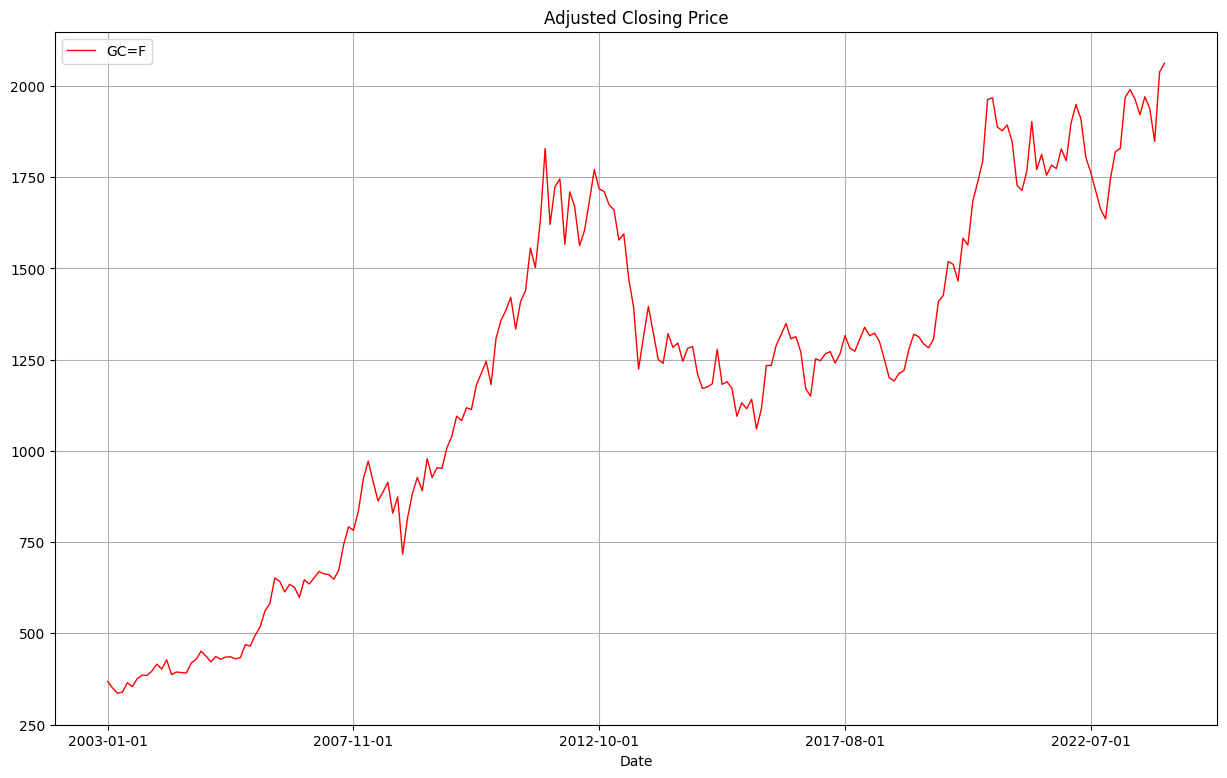

In [40]:
# Adjusted Closing Price Graph

df['Adj Close'].plot(label='GC=F', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

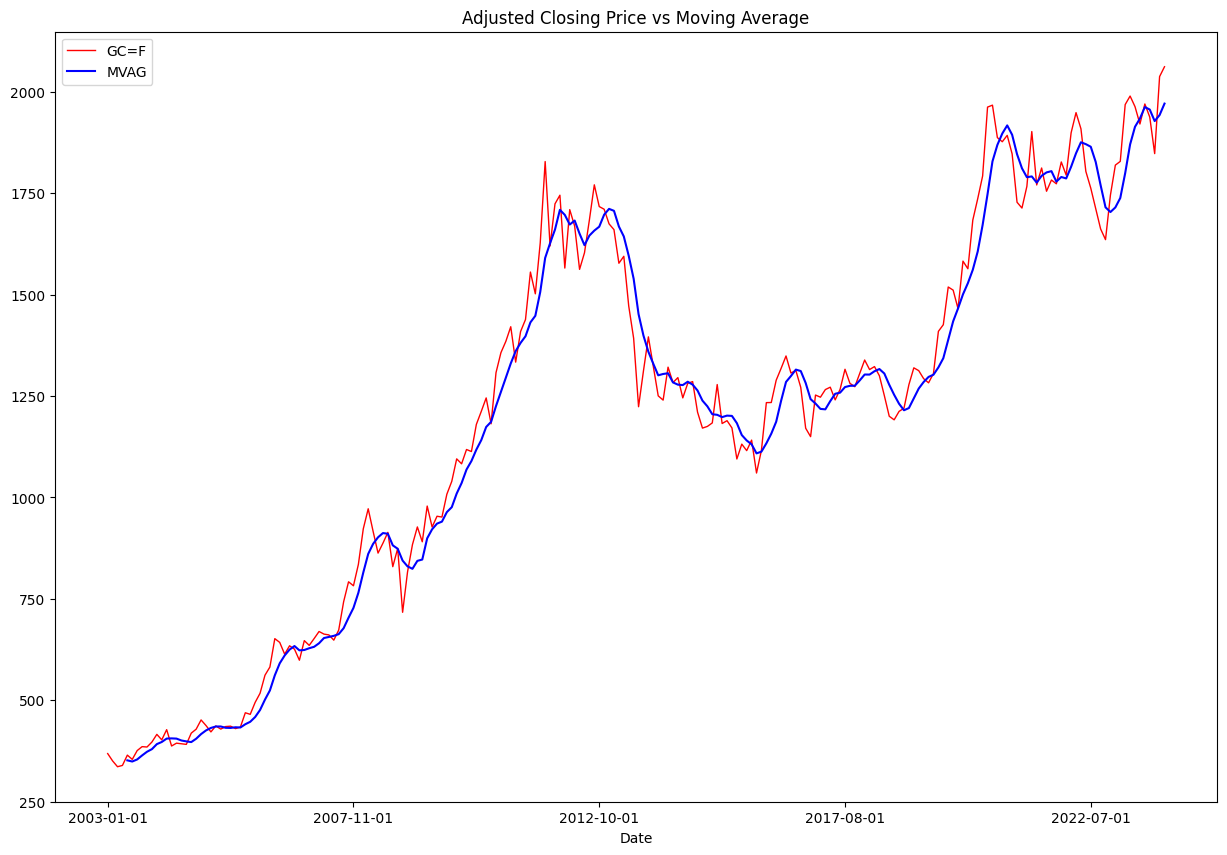

In [43]:
# Adjusting rolling mean

close_col = df['Adj Close']
mvag = close_col.rolling(window=5).mean()

# Adjusted Closing Price vs Moving Average Graph

df['Adj Close'].plot(label='GC=F', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

## 1. Prediction Modelling and Data Training

In [45]:
# Number of months for which to predict the stock prices

predict_months = 12

# Shifting by the Number of Predict months for Prediction array

df['Prediction'] = df['Adj Close'].shift(-predict_months)
# print(df['Prediction'])
# print(df['Adj Close'])

In [47]:
# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_months]      # Size upto predict months
# print(X)
print(X.shape)

# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_months]

# Splitting the data into Training data & Testing data (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(204, 6)


## 2. Linear, Ridge, and Lasso Regression

In [48]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm

# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.8580176442308504


In [49]:
# Defining the Ridge Regression Model

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)     # Training the algorithm

# Score of the Ridge Regression Model (Using the Test Data)

ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.858017753542744


In [50]:
# Defining the Lasso Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

# Score of the Lasso Regression Model (Using the Test Data)

lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)

Lasso Model score: 0.8606870491566252


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.121e+06, tolerance: 3.207e+03
  model = cd_fast.enet_coordinate_descent(


## 3. Final Results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


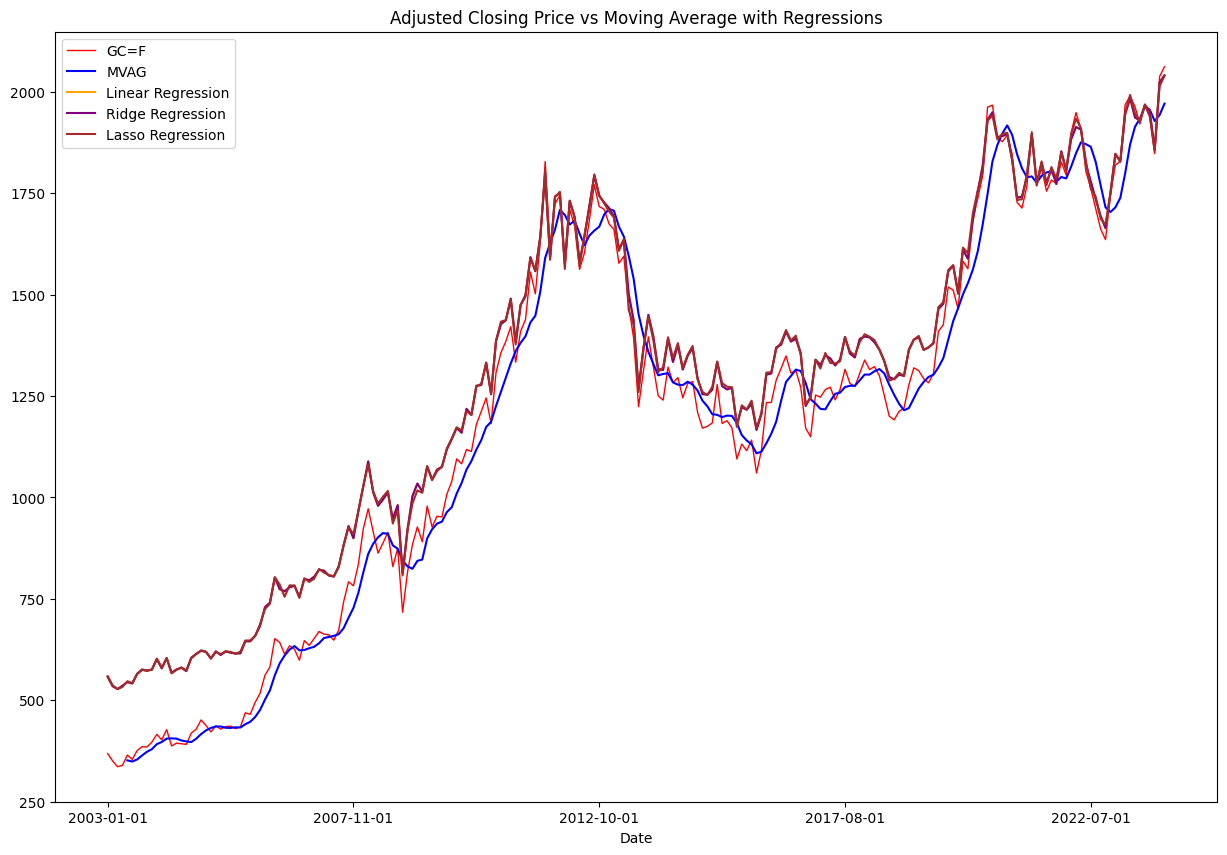

Linear Model score: 0.8580176442308504
Ridge Model score: 0.858017753542744
Lasso Model score: 0.8606870491566252


In [51]:
import matplotlib.pyplot as plt

# Plot Adjusted Closing Price and Moving Average
plt.figure(figsize=(15, 10))
df['Adj Close'].plot(label='GC=F', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')

# Plot Linear Regression, Ridge Regression, and Lasso Regression on the Original Graph
plt.plot(df.index, linear_model.predict(df.drop(['Prediction'], axis=1)), label='Linear Regression', color='orange')
plt.plot(df.index, ridge_model.predict(df.drop(['Prediction'], axis=1)), label='Ridge Regression', color='purple')
plt.plot(df.index, lasso_model.predict(df.drop(['Prediction'], axis=1)), label='Lasso Regression', color='brown')

# Legend and Plotting Settings
plt.legend()
plt.title('Adjusted Closing Price vs Moving Average with Regressions')
plt.show()

# Print the scores
print('Linear Model score:', linear_model_score)
print('Ridge Model score:', ridge_model_score)
print('Lasso Model score:', lasso_model_score)



In [52]:
# Best Performance of the Regressor Models

best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Lasso Model with the score of 86.06870491566252%.
